# Bike Sharing Predictions
[https://www.kaggle.com/terminate9298/bike-sharing-predictions](http://)
<br>Github Link
[https://github.com/terminate9298](http://)
<br>Website
[https://cv.kaus98.ml](http://)
<br>
Please Upvote

This IPython include Predictions with multiple Regression Techniques and various Visualisations...

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'test.csv', 'sampleSubmission.csv']


In [2]:
# Additional Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Dropout
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from math import sqrt

Using TensorFlow backend.


In [3]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

## Data Descriptions

In [4]:
def define_data(data , info=True ,shape = True, percentage =True,describe = True , sample=True , columns = False):
    if columns == True:
        print('\nColumns of Data...')
        print(data.columns)
        return 
    if shape ==True:
        print('Shape of Data is...')
        print(data.shape)
    if info==True:
        print('\nInfo of Data...')
        print(data.info())
    if percentage ==True:
        print('\nPercentage of Data Missing ...')
        print((data.isnull().sum()/data.shape[0])*100)
    if describe == True:
        print('\nDescription of data...')
        display(data.describe())
    if sample == True:
        print('\nSample of Data...')
        display(data.sample(10).T)
    

define_data(train)

Shape of Data is...
(10886, 12)

Info of Data...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB
None

Percentage of Data Missing ...
datetime      0.0
season        0.0
holiday       0.0
workingday    0.0
weather       0.0
temp          0.0
atemp         0.0
humidity      0.0
windspeed     0.0
casual        0.0
registered    0.0
count         0.0
dtype: float64

Description of data...


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000



Sample of Data...


,2014,8483,1027,7814,766,1134,8961,5877,8023,2823
datetime,2011-05-10 20:00:00,2012-07-14 20:00:00,2011-03-07 08:00:00,2012-06-05 23:00:00,2011-02-15 08:00:00,2011-03-11 22:00:00,2012-08-15 18:00:00,2012-02-01 02:00:00,2012-06-14 16:00:00,2011-07-06 13:00:00
season,2,3,1,2,1,1,3,1,2,3
holiday,0,0,0,0,0,0,0,0,0,0
workingday,1,0,1,1,1,1,1,1,1,1
weather,1,1,1,1,1,1,1,1,1,2
temp,22.14,29.52,8.2,22.14,8.2,12.3,30.34,18.04,29.52,30.34
atemp,25.76,35.605,9.09,25.76,9.09,15.15,33.335,21.97,33.335,34.85
humidity,60,84,75,56,32,52,51,44,51,70
windspeed,8.9981,6.0032,26.0027,6.0032,23.9994,11.0014,15.0013,19.0012,19.0012,7.0015
casual,50,101,11,20,10,11,80,1,70,33


## Columns in Test File

In [5]:
define_data(train  , columns = True)
define_data(test  , columns = True)


Columns of Data...
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

Columns of Data...
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')


In [6]:
# Divide DateTime Column to various Columns
def add_dates(data , column , suffix='time_' , year = True , month = True , day = False ,dayofweek = True, hour = True , minute = False  , second = False , date = False , time = False):
    data['add_date_date_time'] = pd.to_datetime(data[column])
    if year == True:
        data[suffix+'year']=data['add_date_date_time'].dt.year
    if month == True:
        data[suffix+'month']=data['add_date_date_time'].dt.month
    if day == True:
        data[suffix+'day']=data['add_date_date_time'].dt.day
    if hour == True:
        data[suffix+'hour']=data['add_date_date_time'].dt.hour
    if minute == True: 
        data[suffix+'minute']=data['add_date_date_time'].dt.minute
    if date == True:
        data[suffix+'date']=data['add_date_date_time'].dt.date
    if time == True:
        data[suffix+'time']=data['add_date_date_time'].dt.time
    if second == True:
        data[suffix+'second']=data['add_date_date_time'].dt.second
    if dayofweek == True:
        data[suffix+'dayofweek']=data['add_date_date_time'].dt.dayofweek
    data = data.drop(columns = ['add_date_date_time'] , axis =1)
    return data
train = add_dates(train , column = 'datetime') 
define_data(train , columns = True)


Columns of Data...
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'time_year', 'time_month', 'time_hour', 'time_dayofweek'],
      dtype='object')


In [7]:
def unique_count(data , columns = []):
    for col in columns :
        print('Unique Data Percentage in ',col)
        print((data[col].value_counts()/data.shape[0])*100)
        print('\n')
unique_count(train , columns = ['season','weather','time_year', 'time_dayofweek'])

Unique Data Percentage in  season
4    25.114826
3    25.105640
2    25.105640
1    24.673893
Name: season, dtype: float64


Unique Data Percentage in  weather
1    66.066507
2    26.033437
3     7.890869
4     0.009186
Name: weather, dtype: float64


Unique Data Percentage in  time_year
2012    50.192908
2011    49.807092
Name: time_year, dtype: float64


Unique Data Percentage in  time_dayofweek
5    14.550799
6    14.504869
3    14.266030
2    14.247658
0    14.247658
1    14.137424
4    14.045563
Name: time_dayofweek, dtype: float64




In [8]:
def display_unique_data(data):
    for i in data.columns:
        unique_cols_data = data[i].unique()
        if len(unique_cols_data)<20:
            print('Correct Type on Column -> ',i)
            print('Unique data in this Column is -> ',unique_cols_data)
            print('\n')
display_unique_data(train)

Correct Type on Column ->  season
Unique data in this Column is ->  [1 2 3 4]


Correct Type on Column ->  holiday
Unique data in this Column is ->  [0 1]


Correct Type on Column ->  workingday
Unique data in this Column is ->  [0 1]


Correct Type on Column ->  weather
Unique data in this Column is ->  [1 2 3 4]


Correct Type on Column ->  time_year
Unique data in this Column is ->  [2011 2012]


Correct Type on Column ->  time_month
Unique data in this Column is ->  [ 1  2  3  4  5  6  7  8  9 10 11 12]


Correct Type on Column ->  time_dayofweek
Unique data in this Column is ->  [5 6 0 1 2 3 4]




# Data Visualisation

In [9]:
display(train.corr().style.format("{:.2%}").highlight_min())
# f,ax = plt.subplots(figsize=(15, 15))
# sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,time_year,time_month,time_hour,time_dayofweek
season,100.00%,2.94%,-0.81%,0.89%,25.87%,26.47%,19.06%,-14.71%,9.68%,16.40%,16.34%,-0.48%,97.15%,-0.65%,-1.06%
holiday,2.94%,100.00%,-25.05%,-0.71%,0.03%,-0.52%,0.19%,0.84%,4.38%,-2.10%,-0.54%,1.20%,0.17%,-0.04%,-19.18%
workingday,-0.81%,-25.05%,100.00%,3.38%,3.00%,2.47%,-1.09%,1.34%,-31.91%,11.95%,1.16%,-0.25%,-0.34%,0.28%,-70.43%
weather,0.89%,-0.71%,3.38%,100.00%,-5.50%,-5.54%,40.62%,0.73%,-13.59%,-10.93%,-12.87%,-1.25%,1.21%,-2.27%,-4.77%
temp,25.87%,0.03%,3.00%,-5.50%,100.00%,98.49%,-6.49%,-1.79%,46.71%,31.86%,39.45%,6.12%,25.76%,14.54%,-3.85%
atemp,26.47%,-0.52%,2.47%,-5.54%,98.49%,100.00%,-4.35%,-5.75%,46.21%,31.46%,38.98%,5.85%,26.42%,14.03%,-4.02%
humidity,19.06%,0.19%,-1.09%,40.62%,-6.49%,-4.35%,100.00%,-31.86%,-34.82%,-26.55%,-31.74%,-7.86%,20.45%,-27.80%,-2.65%
windspeed,-14.71%,0.84%,1.34%,0.73%,-1.79%,-5.75%,-31.86%,100.00%,9.23%,9.11%,10.14%,-1.52%,-15.02%,14.66%,-2.48%
casual,9.68%,4.38%,-31.91%,-13.59%,46.71%,46.21%,-34.82%,9.23%,100.00%,49.72%,69.04%,14.52%,9.27%,30.20%,24.70%
registered,16.40%,-2.10%,11.95%,-10.93%,31.86%,31.46%,-26.55%,9.11%,49.72%,100.00%,97.09%,26.43%,16.95%,38.05%,-8.44%


<Figure size 1152x1152 with 0 Axes>

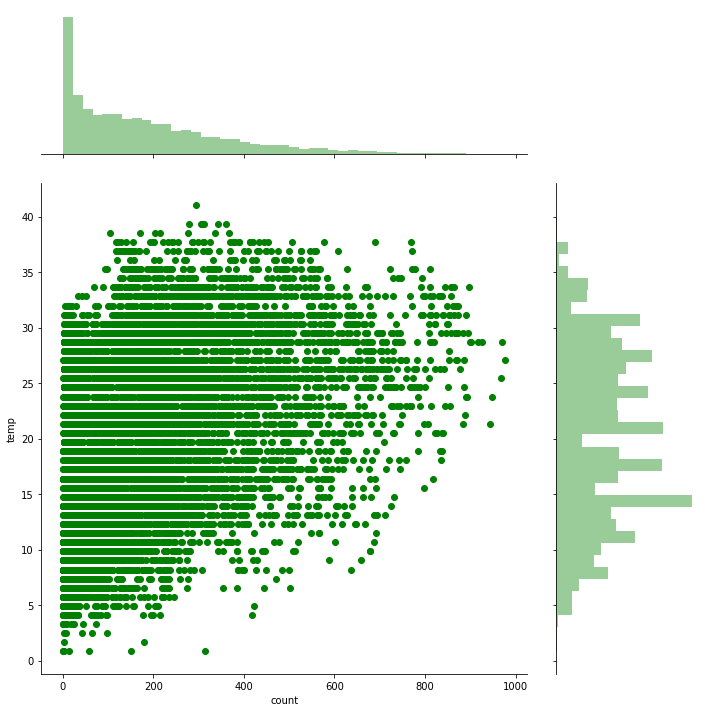

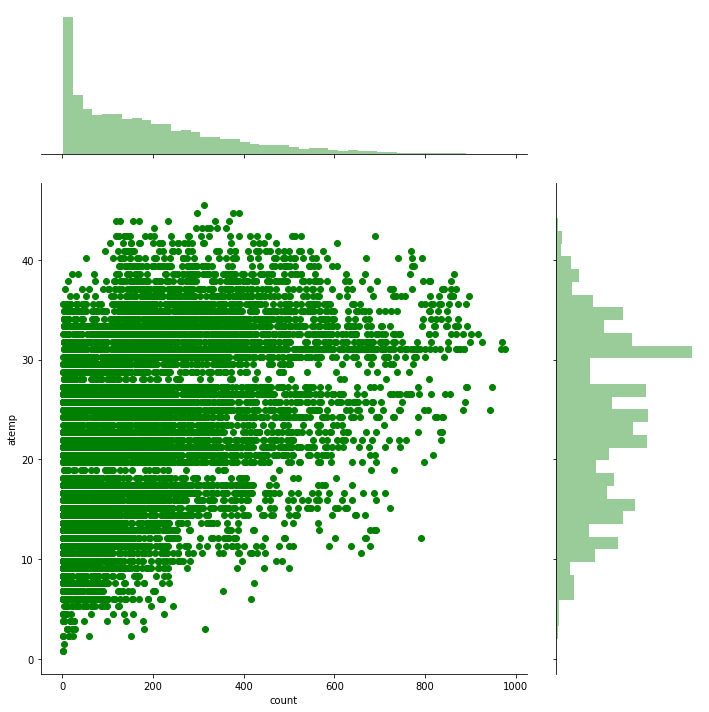

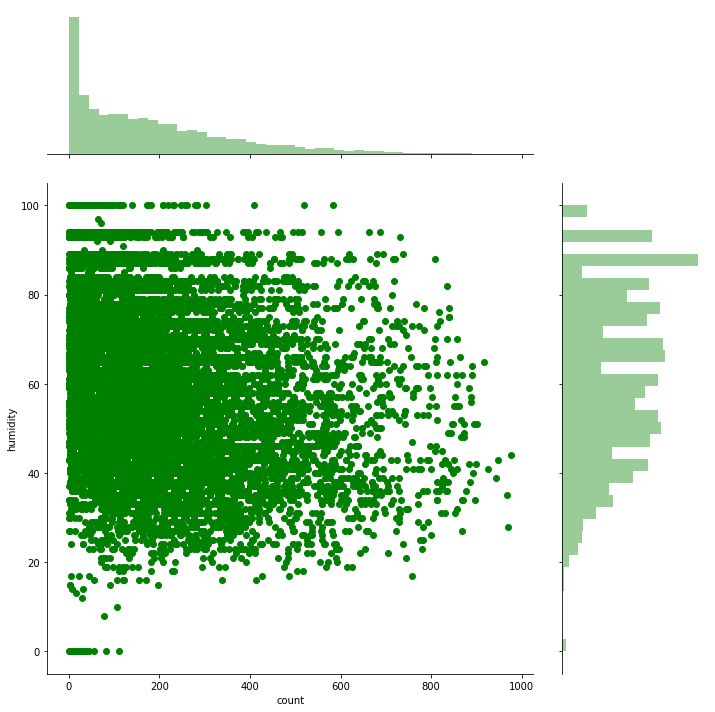

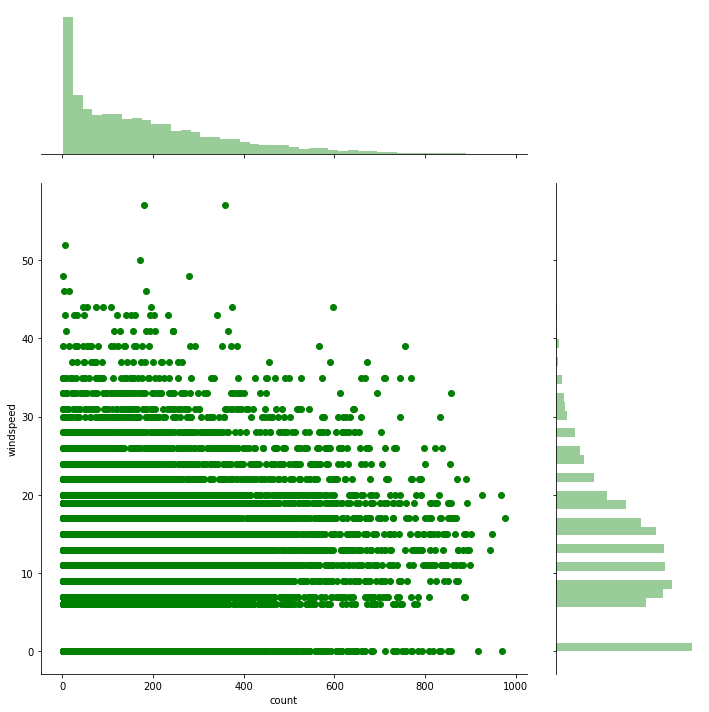

In [10]:
def joint_plots(data , col,columns  = []):
    plt.figure(figsize=(16,16))
    for i in columns:
        sns.jointplot( x=col , y=i , data=data , height=10, ratio=3 , color='g')
        plt.show()
joint_plots(train , columns = ['temp' , 'atemp'  ,'humidity' , 'windspeed' ] , col = 'count')

In [11]:
def plot_bar(data, col ,  feature=[]):
    length = len(feature)*4
    plt.figure(figsize=(20,length))
    for i,j in zip(feature,range(1,len(feature)*2-1,2)):
        plt.subplot(10,2,j)
        #fig = plt.figure(figsize=(9,8))
        sns.barplot(x=i, y=col, data=data, palette='Set2',orient='v')
        plt.plot()
        plt.subplot(10,2,j+1)
        sns.boxplot(x=i, y=col, data=data, palette='Set2'  , width=.4)
        plt.plot()

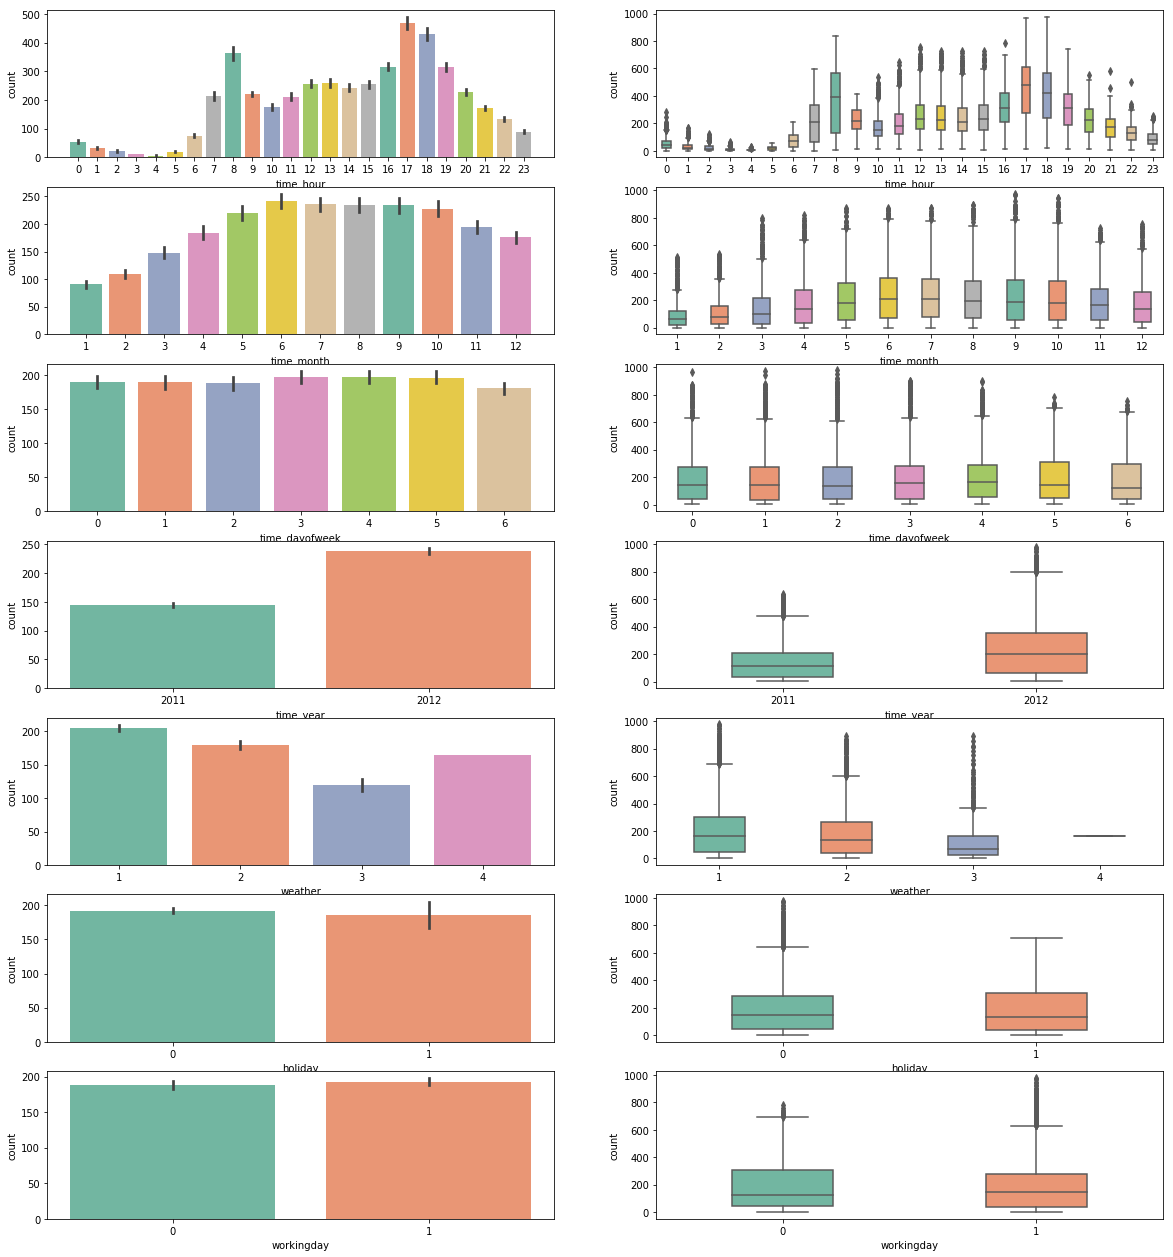

In [12]:
plot_bar(train, col = 'count',feature =['time_hour','time_month','time_dayofweek','time_year','weather', 'holiday' , 'workingday' , 'season' ])

### New Columns and Other Chnages

In [13]:
def hour_group(s):
    if((0<=s) & (s<=6)):
        return 1
    elif((s==7) | (s==9)):
        return 2
    elif((s==8) | (s==16) | (s==19)):
        return 3
    elif((10<=s) & (s<=15)):
        return 4
    elif((s==17) | (s==18)):
        return 5
    elif(20<=s):
        return 6


In [14]:
train['time_hour_group'] = train['time_hour'].apply(hour_group).astype(str)


In [15]:
def new_col_categorical(data , columns = [] , remove_original = True):
    for i in columns:
        unique_cols = data[i].unique()
        if len(unique_cols) < 20:
            print('\nCorrect Type on Column -> ',i)
            print('Unique data in this Column is -> ',unique_cols)
        else:
            return data
    if remove_original == False:
        original_data = data[columns]
    data = pd.get_dummies(data , columns = columns)
    if remove_original == False:
        data = pd.concat([data,original_data] , axis=1)
    return data
        

In [16]:
train = new_col_categorical(train,columns=['season','weather','time_year', 'time_dayofweek' , 'time_month','time_hour_group'] , remove_original = False)


Correct Type on Column ->  season
Unique data in this Column is ->  [1 2 3 4]

Correct Type on Column ->  weather
Unique data in this Column is ->  [1 2 3 4]

Correct Type on Column ->  time_year
Unique data in this Column is ->  [2011 2012]

Correct Type on Column ->  time_dayofweek
Unique data in this Column is ->  [5 6 0 1 2 3 4]

Correct Type on Column ->  time_month
Unique data in this Column is ->  [ 1  2  3  4  5  6  7  8  9 10 11 12]

Correct Type on Column ->  time_hour_group
Unique data in this Column is ->  ['1' '2' '3' '4' '5' '6']


In [17]:
# train[train.holiday == train.workingday].sample(10)
# on Saterday and Sunday there is holiday and thats why both are 0
train['weekend'] = train['time_dayofweek_5']+train['time_dayofweek_6'] 


In [18]:
define_data(train, columns = True )
# train_x_new = train.drop(columns =['datetime','count', 'season_1','casual','registered',
#        'season_2', 'season_3', 'season_4', 'weather_1', 'weather_2',
#        'weather_3', 'weather_4', 'time_year_2011', 'time_year_2012',
#        'time_dayofweek_0', 'time_dayofweek_1', 'time_dayofweek_2',
#        'time_dayofweek_3', 'time_dayofweek_4', 'time_dayofweek_5',
#        'time_dayofweek_6', 'time_month_1', 'time_month_2', 'time_month_3',
#        'time_month_4', 'time_month_5', 'time_month_6', 'time_month_7',
#        'time_month_8', 'time_month_9', 'time_month_10', 'time_month_11',
#        'time_month_12'] , axis = 1)
train_x_new = train.drop(columns =['datetime','count', 'casual','registered',
       'season', 'weather', 'time_year',
       'time_dayofweek', 'time_month','time_hour_group'] , axis = 1)
train_y_new = train['count']
define_data(train_x_new, columns = True )


Columns of Data...
Index(['datetime', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count', 'time_hour', 'season_1',
       'season_2', 'season_3', 'season_4', 'weather_1', 'weather_2',
       'weather_3', 'weather_4', 'time_year_2011', 'time_year_2012',
       'time_dayofweek_0', 'time_dayofweek_1', 'time_dayofweek_2',
       'time_dayofweek_3', 'time_dayofweek_4', 'time_dayofweek_5',
       'time_dayofweek_6', 'time_month_1', 'time_month_2', 'time_month_3',
       'time_month_4', 'time_month_5', 'time_month_6', 'time_month_7',
       'time_month_8', 'time_month_9', 'time_month_10', 'time_month_11',
       'time_month_12', 'time_hour_group_1', 'time_hour_group_2',
       'time_hour_group_3', 'time_hour_group_4', 'time_hour_group_5',
       'time_hour_group_6', 'season', 'weather', 'time_year', 'time_dayofweek',
       'time_month', 'time_hour_group', 'weekend'],
      dtype='object')

Columns of Data...
Index(['holiday', 'workingda

In [19]:
# Processing Test Data
test = add_dates(test , column = 'datetime') 
test['time_hour_group'] = test['time_hour'].apply(hour_group).astype(str)
test = new_col_categorical(test,columns=['season','weather','time_year', 'time_dayofweek' , 'time_month','time_hour_group'] , remove_original = False)
test['weekend'] = test['time_dayofweek_5']+test['time_dayofweek_6'] 
# test_x_new = test.drop(columns =['datetime', 'season_1',
#        'season_2', 'season_3', 'season_4', 'weather_1', 'weather_2',
#        'weather_3', 'weather_4', 'time_year_2011', 'time_year_2012',
#        'time_dayofweek_0', 'time_dayofweek_1', 'time_dayofweek_2',
#        'time_dayofweek_3', 'time_dayofweek_4', 'time_dayofweek_5',
#        'time_dayofweek_6', 'time_month_1', 'time_month_2', 'time_month_3',
#        'time_month_4', 'time_month_5', 'time_month_6', 'time_month_7',
#        'time_month_8', 'time_month_9', 'time_month_10', 'time_month_11',
#        'time_month_12'] , axis = 1)

test_x_new = test.drop(columns =['datetime',
       'season', 'weather', 'time_year',
       'time_dayofweek', 'time_month','time_hour_group'] , axis = 1)


Correct Type on Column ->  season
Unique data in this Column is ->  [1 2 3 4]

Correct Type on Column ->  weather
Unique data in this Column is ->  [1 2 3 4]

Correct Type on Column ->  time_year
Unique data in this Column is ->  [2011 2012]

Correct Type on Column ->  time_dayofweek
Unique data in this Column is ->  [3 4 5 6 0 1 2]

Correct Type on Column ->  time_month
Unique data in this Column is ->  [ 1  2  3  4  5  6  7  8  9 10 11 12]

Correct Type on Column ->  time_hour_group
Unique data in this Column is ->  ['1' '2' '3' '4' '5' '6']


In [20]:
print('For Train Data .. ')
define_data(train_x_new, columns = True )
print('For Test Data .. ')
define_data(test_x_new , columns = True )

For Train Data .. 

Columns of Data...
Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'time_hour', 'season_1', 'season_2', 'season_3', 'season_4',
       'weather_1', 'weather_2', 'weather_3', 'weather_4', 'time_year_2011',
       'time_year_2012', 'time_dayofweek_0', 'time_dayofweek_1',
       'time_dayofweek_2', 'time_dayofweek_3', 'time_dayofweek_4',
       'time_dayofweek_5', 'time_dayofweek_6', 'time_month_1', 'time_month_2',
       'time_month_3', 'time_month_4', 'time_month_5', 'time_month_6',
       'time_month_7', 'time_month_8', 'time_month_9', 'time_month_10',
       'time_month_11', 'time_month_12', 'time_hour_group_1',
       'time_hour_group_2', 'time_hour_group_3', 'time_hour_group_4',
       'time_hour_group_5', 'time_hour_group_6', 'weekend'],
      dtype='object')
For Test Data .. 

Columns of Data...
Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'time_hour', 'season_1', 'season_2', 'season_3', 'seas

## MINMAX Scaling

In [21]:
scaler = MinMaxScaler()
train_x_new = scaler.fit_transform(train_x_new)
train_y_new = np.log1p(train_y_new)

In [22]:
test_x_new_1 = scaler.transform(test_x_new)
test_x_new_2 = scaler.fit_transform(test_x_new)

In [23]:
X_train , X_test , Y_train , Y_test = train_test_split(train_x_new , train_y_new , test_size = .15 , random_state = 65 )

In [24]:
valid_0_error =0
valid_1_error =0

In [25]:
def score_diff(valid_0_error , valid_1_error , valid_0_error_new , valid_1_error_new):
    if valid_0_error == 0:
        print('First Observaton')
        print('Train Error is : ',valid_0_error_new)
        print('Test Error is : ',valid_1_error_new)
        print('Diffence Between Train and Test is : ',((valid_1_error_new-valid_0_error_new)/valid_0_error_new)*100 ,' %')
    else:
        if valid_0_error_new > valid_0_error:
            print('Train Error is : ',valid_0_error_new)
            print('Test Error is : ',valid_1_error_new)
            print('Train Error have Gone up by  : ',((valid_0_error_new-valid_0_error)/valid_0_error)*100,'%')
            print('Test Error have Gone up by  : ',((valid_1_error_new-valid_1_error)/valid_1_error)*100,'%')
            print('Diffence Between Train and Test is : ',((valid_1_error_new-valid_0_error_new)/valid_0_error_new)*100 ,' %')
            print('Earlier Diffence Between Train and Test is : ',((valid_1_error-valid_0_error)/valid_0_error)*100 ,' %')
        if valid_0_error_new < valid_0_error:
            print('Train Error is : ',valid_0_error_new)
            print('Test Error is : ',valid_1_error_new)
            print('Train Error have Down up by  : ',((valid_0_error-valid_0_error_new)/valid_0_error_new)*100,'%') 
            print('Test Error have Down up by  : ',((valid_1_error-valid_1_error_new)/valid_1_error_new)*100,'%') 
            print('Diffence Between Train and Test is : ',((valid_1_error_new-valid_0_error_new)/valid_0_error_new)*100 ,' %')
            print('Earlier Diffence Between Train and Test is : ',((valid_1_error-valid_0_error)/valid_0_error)*100 ,' %')
        if valid_0_error_new == valid_0_error:
            print('No Differnce in new Obseravtion')
            print('Train Error is : ',valid_0_error_new)
            print('Test Error is : ',valid_1_error_new)
            print('Diffence Between Train and Test is : ',((valid_1_error_new-valid_0_error_new)/valid_0_error_new)*100 ,' %')


# Predictions

In [26]:
train_set = lgb.Dataset(X_train , label = Y_train)
val_set = lgb.Dataset( X_test, label = Y_test)

In [27]:
%%time
params = {
        "objective" : "regression", 
        "metric" : "mae", 
        "num_leaves" : 60, 
        "learning_rate" : 0.01, 
        "bagging_fraction" : 0.9,
        "bagging_seed" : 0, 
        "num_threads" : 4,
        "colsample_bytree" : 0.5, 
        'lambda_l2':9
}

model = lgb.train(  params, 
                    train_set = train_set,
                    num_boost_round=10000,
                    early_stopping_rounds=200,
                    verbose_eval=100, 
                    valid_sets=[train_set,val_set]
                  )



Training until validation scores don't improve for 200 rounds.
[100]	training's l1: 0.597271	valid_1's l1: 0.612246
[200]	training's l1: 0.37267	valid_1's l1: 0.384703
[300]	training's l1: 0.265956	valid_1's l1: 0.279359
[400]	training's l1: 0.216175	valid_1's l1: 0.231953
[500]	training's l1: 0.192099	valid_1's l1: 0.210373
[600]	training's l1: 0.179765	valid_1's l1: 0.200009
[700]	training's l1: 0.171918	valid_1's l1: 0.194719
[800]	training's l1: 0.166144	valid_1's l1: 0.191316
[900]	training's l1: 0.161726	valid_1's l1: 0.189124
[1000]	training's l1: 0.157947	valid_1's l1: 0.187558
[1100]	training's l1: 0.154567	valid_1's l1: 0.186121
[1200]	training's l1: 0.151769	valid_1's l1: 0.185256
[1300]	training's l1: 0.14923	valid_1's l1: 0.184521
[1400]	training's l1: 0.146944	valid_1's l1: 0.183884
[1500]	training's l1: 0.144837	valid_1's l1: 0.183416
[1600]	training's l1: 0.143014	valid_1's l1: 0.183108
[1700]	training's l1: 0.141308	valid_1's l1: 0.182786
[1800]	training's l1: 0.139541

In [28]:
%%time
lgb_pred_test = model.predict(X_test, num_iteration=model.best_iteration)
lgb_pred_train = model.predict(X_train, num_iteration=model.best_iteration)
lgb_pred_normal = model.predict(test_x_new_1, num_iteration=model.best_iteration)
lgb_pred_fit = model.predict(test_x_new_2, num_iteration=model.best_iteration)

CPU times: user 12.2 s, sys: 4 ms, total: 12.2 s
Wall time: 6.24 s


In [29]:
# print(lgb_pred)
# print(np.array(Y_test))
valid_0_error_new = sqrt(mean_squared_error(np.array(Y_train),lgb_pred_train))
valid_1_error_new = sqrt(mean_squared_error(np.array(Y_test),lgb_pred_test))
score_diff(valid_0_error , valid_1_error , valid_0_error_new , valid_1_error_new)
valid_0_error = valid_0_error_new
valid_1_error = valid_1_error_new

First Observaton
Train Error is :  0.1816027356548282
Test Error is :  0.2632683641980883
Diffence Between Train and Test is :  44.96938234371189  %


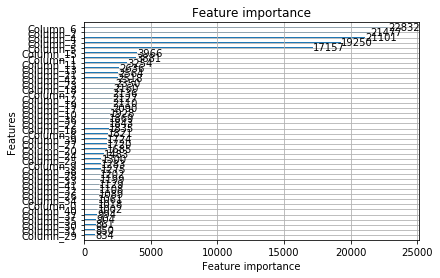

In [30]:
lgb.plot_importance(model)

In [31]:
%%time
n_estimators=100
xgb = XGBRegressor(n_estimators=n_estimators,max_depth=4,learning_rate =0.01 , booster = 'gbtree')
xgb.fit(X_train ,Y_train ,eval_set=[(X_train, Y_train), (X_test, Y_test)] , verbose = False)
score = xgb.evals_result()
valid_0_error_new = np.amin(score['validation_0']['rmse'])
valid_1_error_new = np.amin(score['validation_1']['rmse'])
score_diff(valid_0_error , valid_1_error , valid_0_error_new , valid_1_error_new)
valid_0_error = valid_0_error_new
valid_1_error = valid_1_error_new

/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[06:10:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train Error is :  1.688898
Test Error is :  1.689375
Train Error have Gone up by  :  829.9959022699325 %
Test Error have Gone up by  :  541.6931275224854 %
Diffence Between Train and Test is :  0.028243268687633043  %
Earlier Diffence Between Train and Test is :  44.96938234371189  %
CPU times: user 1.86 s, sys: 188 ms, total: 2.05 s
Wall time: 2.23 s


In [32]:
%%time
model = RandomForestRegressor(random_state=65, n_estimators=200, min_samples_split=4)
result = model.fit(X_train, Y_train)

CPU times: user 7.54 s, sys: 36 ms, total: 7.58 s
Wall time: 7.58 s


In [33]:
model.score(X_test, Y_test)

0.9571245331184974

CPU times: user 28 ms, sys: 0 ns, total: 28 ms
Wall time: 22.3 ms


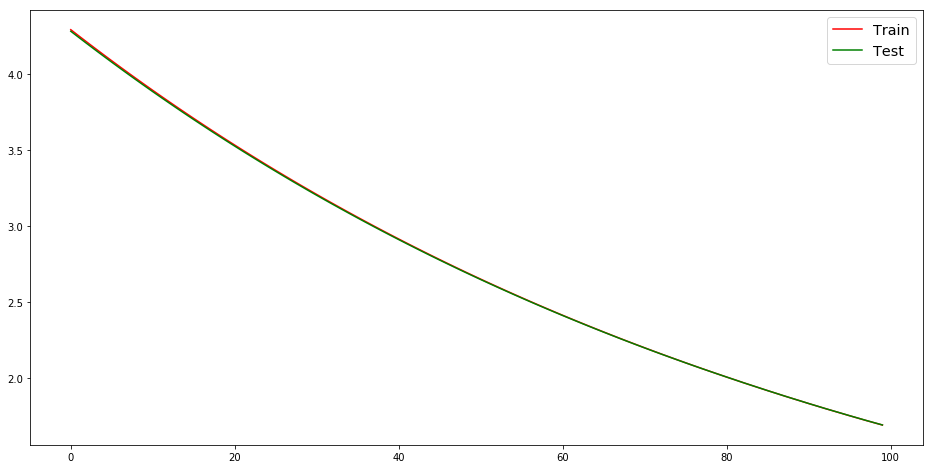

In [34]:
%%time
start_point = n_estimators-100
r = range(start_point,n_estimators)
plt.figure(figsize=(16,8))
plt.plot(r , score['validation_0']['rmse'][start_point:]  ,'r' ,label ='Train')
plt.plot(r , score['validation_1']['rmse'][start_point:]  , 'g' , label = 'Test' )
plt.legend(fontsize='x-large')


In [35]:
%%time
n_estimators=3000
xgb = XGBRegressor(n_estimators=n_estimators,max_depth=4,learning_rate =0.01 , booster = 'gbtree')
xgb.fit(train_x_new , train_y_new ,eval_set=[(X_train, Y_train), (X_test, Y_test)] , verbose = False)
pred_normal = xgb.predict(test_x_new_1)
pred_fit = xgb.predict(test_x_new_2)

/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[06:10:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 57.8 s, sys: 608 ms, total: 58.4 s
Wall time: 58.4 s


In [36]:
%%time
model = RandomForestRegressor(random_state=65, n_estimators=n_estimators-2000)
model.fit(train_x_new , train_y_new)
rfr_pred_normal = model.predict(test_x_new_1)
rfr_pred_fit = model.predict(test_x_new_2)

CPU times: user 51.5 s, sys: 468 ms, total: 51.9 s
Wall time: 52 s


In [37]:
%%time
pred_normal = np.expm1(pred_normal)
pred_fit = np.expm1(pred_fit)
rfr_pred_normal = np.expm1(rfr_pred_normal)
rfr_pred_fit = np.expm1(rfr_pred_fit)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 1.42 ms


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               5632      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
__________

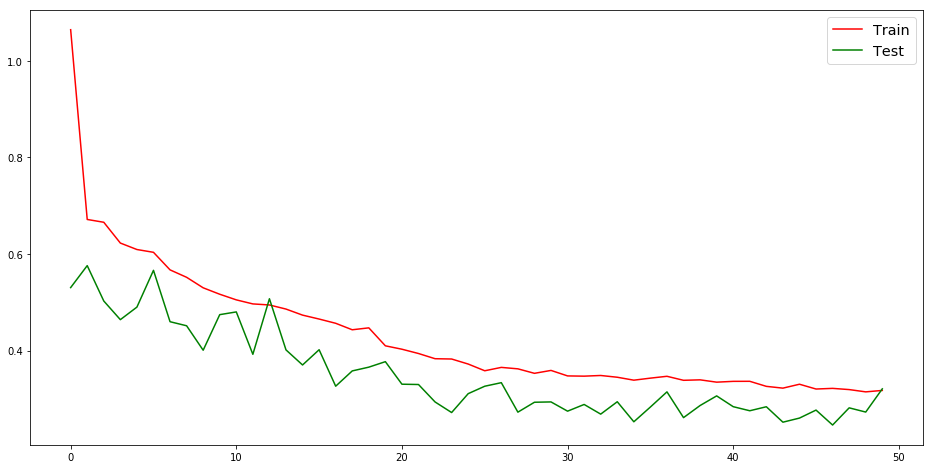

In [38]:
%%time
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train_x_new.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dropout(0.3))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dropout(0.3))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dropout(0.3))
# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

history = NN_model.fit(train_x_new,train_y_new, epochs=50, batch_size=64,  verbose=1, validation_split=0.2)
start_point = 150-100
r = range(start_point,150)
plt.figure(figsize=(16,8))
plt.plot( history.history['loss']  ,'r' ,label ='Train')
plt.plot( history.history['val_loss']  , 'g' , label = 'Test' )
plt.legend(fontsize='x-large')
valid_0_error_new = history.history['loss'][-1]
valid_1_error_new = history.history['val_loss'][-1]
score_diff(valid_0_error , valid_1_error , valid_0_error_new , valid_1_error_new)
valid_0_error = valid_0_error_new
valid_1_error = valid_1_error_new


In [39]:
ANN_pred_normal = NN_model.predict(test_x_new_1)
ANN_pred_fit = NN_model.predict(test_x_new_2)
ANN_pred_normal = np.expm1(ANN_pred_normal)
ANN_pred_fit = np.expm1(ANN_pred_fit)
ANN_pred_fit = ANN_pred_fit.reshape(6493)
ANN_pred_normal = ANN_pred_normal.reshape(6493)

In [40]:
output = pd.DataFrame({'datetime': test.datetime,'count': pred_normal})
output.to_csv('xgb_pred_normal.csv', index=False)
output = pd.DataFrame({'datetime': test.datetime,'count': pred_fit})
output.to_csv('xgb_pred_fit.csv', index=False)
output = pd.DataFrame({'datetime': test.datetime,'count': rfr_pred_normal})
output.to_csv('rfr_pred_normal.csv', index=False)
output = pd.DataFrame({'datetime': test.datetime,'count': rfr_pred_fit})
output.to_csv('rfr_pred_fit.csv', index=False)
output = pd.DataFrame({'datetime': test.datetime,'count': ANN_pred_normal})
output.to_csv('ANN_pred_normal.csv', index=False)
output = pd.DataFrame({'datetime': test.datetime,'count': ANN_pred_fit})
output.to_csv('ANN_pred_fit.csv', index=False)
output = pd.DataFrame({'datetime': test.datetime,'count': lgb_pred_normal})
output.to_csv('lgb_pred_normal.csv', index=False)
output = pd.DataFrame({'datetime': test.datetime,'count': lgb_pred_fit})
output.to_csv('lgb_pred_fit.csv', index=False)